In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import  StandardScaler

In [30]:
#downloading test.csv
!gdown --id 1oTSiYuBdbU41pviWYUQXta_OT4qv6a4b

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1oTSiYuBdbU41pviWYUQXta_OT4qv6a4b
To: /content/test.csv
100% 18.3M/18.3M [00:00<00:00, 28.2MB/s]


In [31]:
# downloading train.csv
!gdown --id 1MOOhKGhMRsjJWxy18Z3XKXOxzCfKPDZI

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1MOOhKGhMRsjJWxy18Z3XKXOxzCfKPDZI
To: /content/train.csv
100% 76.8M/76.8M [00:00<00:00, 235MB/s]


In [32]:
#Reading data
train_data_df = pd.read_csv("train.csv")
train_data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
test_data_df = pd.read_csv("test.csv")
test_data_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# starting model building

y_train=train_data_df['label']
x_train=train_data_df.drop('label',axis=1)
print(y_train.head())
x_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y_test=test_data_df['label']
x_test=test_data_df.drop('label',axis=1)
print(y_test.head())
x_test.head()

0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0


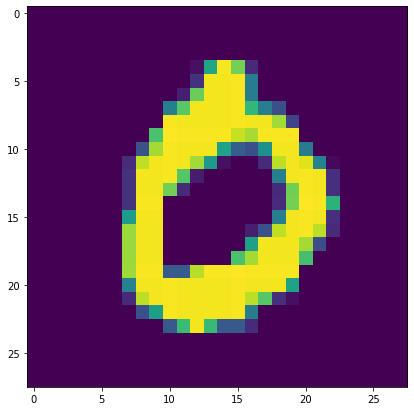

In [36]:
plt.figure(figsize=(7,7))
digit_index=3
digit_image = x_test.iloc[digit_index].to_numpy()
plt.imshow(np.reshape(digit_image, (28,28)))
print(y_test[digit_index])



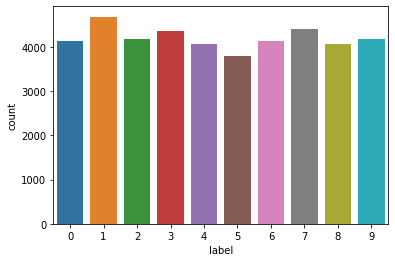

In [37]:
sns.countplot(x='label',data=train_data_df)
#checking if the data is balanced

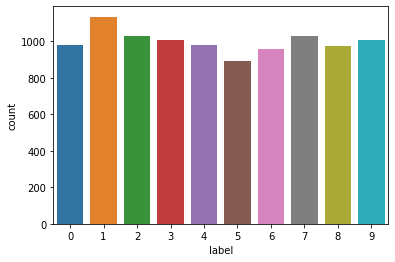

In [38]:
sns.countplot(x='label',data=test_data_df)
#checking if the data is balanced

In [39]:
scaler = StandardScaler()
scaler.fit(x_train,y_train)
x_train = scaler.transform(x_train)
x_train.shape


(42000, 784)

In [40]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


(42000, 784) (42000,) (10000, 784) (10000,)


In [41]:
#for K=3
classifier_3 = KNeighborsClassifier(n_neighbors = 3)
classifier_3.fit(x_train, y_train)

#for K=5
classifier_5 = KNeighborsClassifier(n_neighbors = 5)
classifier_5.fit(x_train, y_train)

#for K=7
classifier_7 = KNeighborsClassifier(n_neighbors = 7)
classifier_7.fit(x_train, y_train)

#for K=9
classifier_9 = KNeighborsClassifier(n_neighbors = 9)
classifier_9.fit(x_train, y_train)

#for K=11
classifier_11 = KNeighborsClassifier(n_neighbors = 11)
classifier_11.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=11)

In [42]:
y_pred_3 = classifier_3.predict(x_test)
y_pred_3

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([7, 2, 1, ..., 8, 5, 6])

In [43]:
y_pred_5 = classifier_5.predict(x_test)
y_pred_5

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([7, 2, 1, ..., 4, 5, 6])

In [44]:
y_pred_7 = classifier_7.predict(x_test)
y_pred_7

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([7, 2, 1, ..., 4, 5, 6])

In [45]:
y_pred_9 = classifier_9.predict(x_test)
y_pred_9

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([7, 2, 1, ..., 4, 5, 6])

In [46]:
y_pred_11 = classifier_11.predict(x_test)
y_pred_11

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([7, 2, 1, ..., 4, 5, 6])

In [47]:
# Report for K=3
print("Accuracy of model = ",accuracy_score(y_test, y_pred_3))
print("Report\n",classification_report(y_test, y_pred_3))

Accuracy of model =  0.7889
Report
               precision    recall  f1-score   support

           0       0.45      0.99      0.62       980
           1       1.00      0.88      0.93      1135
           2       0.96      0.80      0.87      1032
           3       0.95      0.74      0.84      1010
           4       0.98      0.56      0.71       982
           5       0.97      0.59      0.73       892
           6       0.97      0.88      0.92       958
           7       0.93      0.84      0.89      1028
           8       0.57      0.83      0.67       974
           9       0.88      0.75      0.81      1009

    accuracy                           0.79     10000
   macro avg       0.86      0.79      0.80     10000
weighted avg       0.87      0.79      0.80     10000



Text(69.0, 0.5, 'Truth')

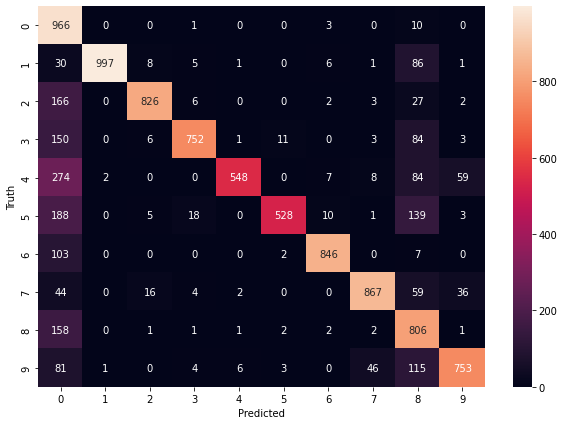

In [48]:
cm=confusion_matrix(y_test,y_pred_3)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
# Report for K=5
print("Accuracy of model = ",accuracy_score(y_test, y_pred_5))
print("Report\n",classification_report(y_test, y_pred_5))

Accuracy of model =  0.8215
Report
               precision    recall  f1-score   support

           0       0.54      0.99      0.70       980
           1       1.00      0.89      0.94      1135
           2       0.97      0.86      0.91      1032
           3       0.95      0.81      0.87      1010
           4       0.99      0.56      0.72       982
           5       0.97      0.65      0.78       892
           6       0.96      0.91      0.93       958
           7       0.96      0.86      0.90      1028
           8       0.57      0.93      0.71       974
           9       0.87      0.75      0.81      1009

    accuracy                           0.82     10000
   macro avg       0.88      0.82      0.83     10000
weighted avg       0.88      0.82      0.83     10000



Text(69.0, 0.5, 'Truth')

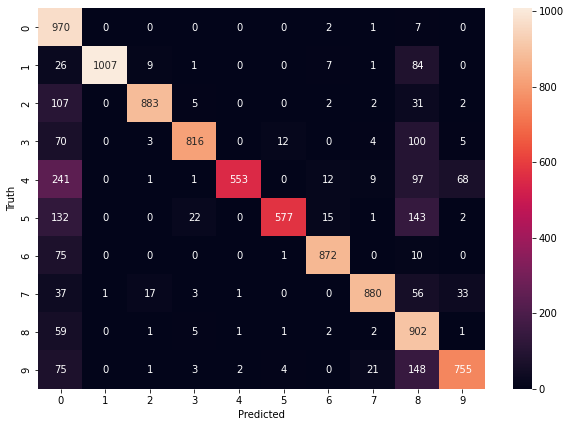

In [50]:
cm=confusion_matrix(y_test,y_pred_5)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
# Report for K=7
print("Accuracy of model = ",accuracy_score(y_test, y_pred_7))
print("Report\n",classification_report(y_test, y_pred_7))

Accuracy of model =  0.8291
Report
               precision    recall  f1-score   support

           0       0.60      0.99      0.75       980
           1       1.00      0.90      0.95      1135
           2       0.95      0.86      0.91      1032
           3       0.95      0.83      0.88      1010
           4       0.99      0.58      0.73       982
           5       0.98      0.64      0.77       892
           6       0.95      0.92      0.93       958
           7       0.97      0.85      0.91      1028
           8       0.55      0.95      0.70       974
           9       0.86      0.74      0.80      1009

    accuracy                           0.83     10000
   macro avg       0.88      0.83      0.83     10000
weighted avg       0.88      0.83      0.84     10000



Text(69.0, 0.5, 'Truth')

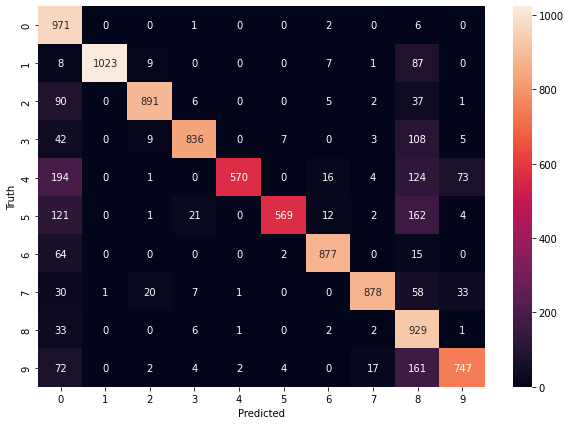

In [52]:
cm=confusion_matrix(y_test,y_pred_7)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
# Report for K=9
print("Accuracy of model = ",accuracy_score(y_test, y_pred_9))
print("Report\n",classification_report(y_test, y_pred_9))

Accuracy of model =  0.8368
Report
               precision    recall  f1-score   support

           0       0.63      0.99      0.77       980
           1       1.00      0.92      0.95      1135
           2       0.95      0.87      0.91      1032
           3       0.95      0.84      0.89      1010
           4       0.99      0.59      0.74       982
           5       0.98      0.64      0.77       892
           6       0.95      0.92      0.94       958
           7       0.96      0.86      0.91      1028
           8       0.55      0.96      0.70       974
           9       0.87      0.75      0.80      1009

    accuracy                           0.84     10000
   macro avg       0.88      0.83      0.84     10000
weighted avg       0.89      0.84      0.84     10000



Text(69.0, 0.5, 'Truth')

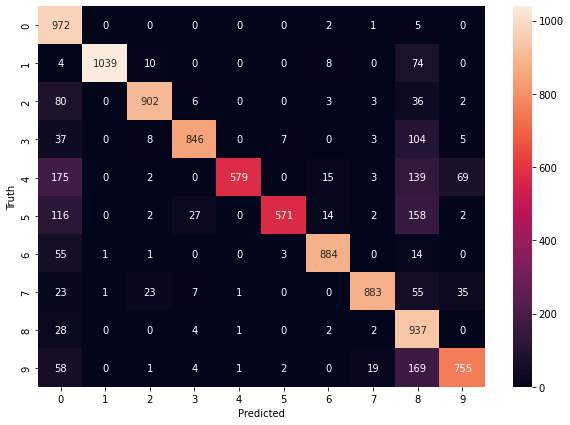

In [54]:
cm=confusion_matrix(y_test,y_pred_9)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
# Report for K=11
print("Accuracy of model = ",accuracy_score(y_test, y_pred_11))
print("Report\n",classification_report(y_test, y_pred_11))

Accuracy of model =  0.8416
Report
               precision    recall  f1-score   support

           0       0.66      0.99      0.79       980
           1       1.00      0.92      0.95      1135
           2       0.95      0.88      0.91      1032
           3       0.95      0.84      0.89      1010
           4       1.00      0.61      0.76       982
           5       0.98      0.64      0.78       892
           6       0.95      0.93      0.94       958
           7       0.97      0.85      0.91      1028
           8       0.55      0.97      0.70       974
           9       0.87      0.75      0.81      1009

    accuracy                           0.84     10000
   macro avg       0.89      0.84      0.84     10000
weighted avg       0.89      0.84      0.85     10000



Text(69.0, 0.5, 'Truth')

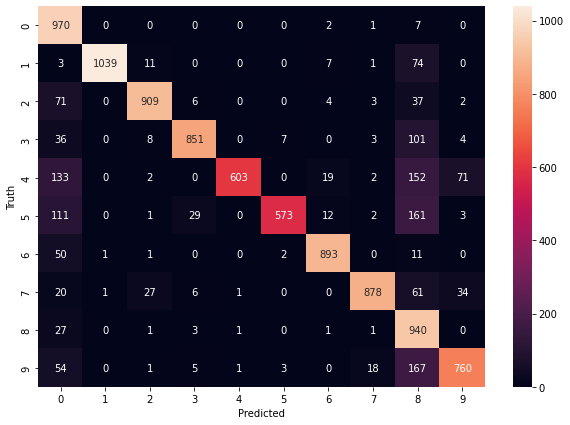

In [56]:
cm=confusion_matrix(y_test,y_pred_11)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')